In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [56]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display basic info
print("Training Data Info:")
print(train_data.info())
print("\nValidation Data Info:")

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 87 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   col_1   10000 non-null  int64
 1   col_2   10000 non-null  int64
 2   col_3   10000 non-null  int64
 3   col_4   10000 non-null  int64
 4   col_5   10000 non-null  int64
 5   col_6   10000 non-null  int64
 6   col_7   10000 non-null  int64
 7   col_8   10000 non-null  int64
 8   col_9   10000 non-null  int64
 9   col_10  10000 non-null  int64
 10  col_11  10000 non-null  int64
 11  col_12  10000 non-null  int64
 12  col_13  10000 non-null  int64
 13  col_14  10000 non-null  int64
 14  col_15  10000 non-null  int64
 15  col_16  10000 non-null  int64
 16  col_17  10000 non-null  int64
 17  col_18  10000 non-null  int64
 18  col_19  10000 non-null  int64
 19  col_20  10000 non-null  int64
 20  col_21  10000 non-null  int64
 21  col_22  10000 non-null  int64
 22  col_23  10000 non-null  int

In [57]:
# Check for missing values
print("Missing values in train data:", train_data.isnull().sum().sum())
# print("Missing values in validation data:", validation_data.isnull().sum().sum())
print("Missing values in test data:", test_data.isnull().sum().sum())

Missing values in train data: 0
Missing values in test data: 0


In [58]:
print("\nTraining Data Summary Statistics:\n", train_data.describe())



Training Data Summary Statistics:
              col_1         col_2         col_3         col_4         col_5  \
count  10000.00000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.49610      0.509300      0.489600      0.499200      0.494000   
std        0.50001      0.499939      0.499917      0.500024      0.499989   
min        0.00000      0.000000      0.000000      0.000000      0.000000   
25%        0.00000      0.000000      0.000000      0.000000      0.000000   
50%        0.00000      1.000000      0.000000      0.000000      0.000000   
75%        1.00000      1.000000      1.000000      1.000000      1.000000   
max        1.00000      1.000000      1.000000      1.000000      1.000000   

              col_6         col_7         col_8         col_9        col_10  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.497900      0.499200      0.504700      0.502800      0.500600   
std        0.500021     

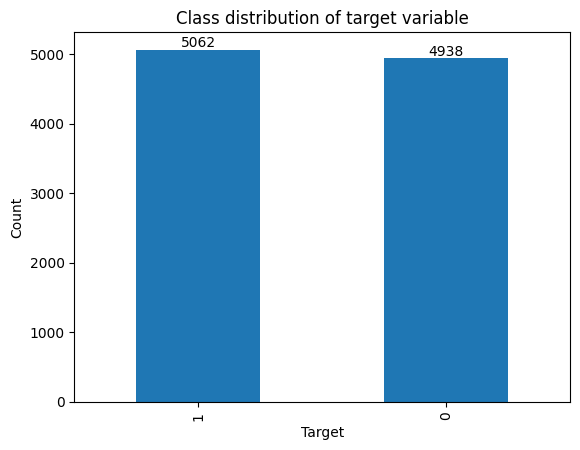

In [26]:
# Class distribution of target variable with values printed
plt.figure()
ax = train_data['output'].value_counts().plot(kind='bar')
plt.title('Class distribution of target variable')
plt.xlabel('Target')
plt.ylabel('Count')

ax.bar_label(ax.containers[0])

plt.show()


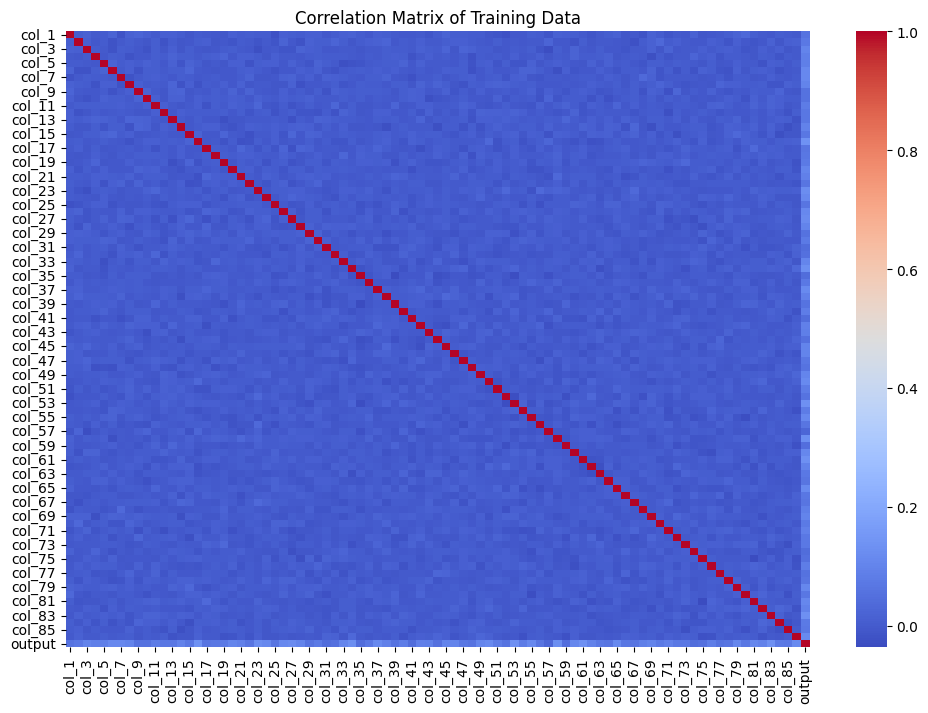

In [27]:
# Correlation matrix (with a heatmap)
corr_matrix = train_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Correlation Matrix of Training Data")
plt.show()

In [28]:
# Get highly correlated features
corr_features = corr_matrix['output'].sort_values(ascending=False)
print("Highly correlated features with target variable:\n", corr_features)


Highly correlated features with target variable:
 output    1.000000
col_16    0.135874
col_61    0.132140
col_53    0.131783
col_83    0.129895
            ...   
col_31    0.044239
col_35    0.044053
col_74    0.040961
col_41    0.040700
col_57    0.024832
Name: output, Length: 87, dtype: float64


In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
X = train_data.drop('output', axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

   feature       VIF
0    col_1  1.982911
1    col_2  2.032725
2    col_3  1.951185
3    col_4  1.989159
4    col_5  1.970364
..     ...       ...
81  col_82  2.001571
82  col_83  1.980447
83  col_84  1.999239
84  col_85  2.005213
85  col_86  2.004415

[86 rows x 2 columns]


In [30]:
# High VIF  features
high_vif_features = vif_data[vif_data['VIF'] > 3]
print("Features with high VIF:\n", high_vif_features)

# Sort features by VIF
vif_data = vif_data.sort_values(by='VIF', ascending=False)
print("Features sorted by VIF:\n", vif_data)

Features with high VIF:
 Empty DataFrame
Columns: [feature, VIF]
Index: []
Features sorted by VIF:
    feature       VIF
12  col_13  2.041978
46  col_47  2.033679
1    col_2  2.032725
45  col_46  2.029218
51  col_52  2.029073
..     ...       ...
67  col_68  1.956642
56  col_57  1.955860
15  col_16  1.955056
30  col_31  1.952833
2    col_3  1.951185

[86 rows x 2 columns]


VIF < 5: Generally indicates low to moderate multicollinearity. No immediate action is required.

VIF > 5 but < 10: Suggests moderate to high multicollinearity. You may want to consider looking into these features, especially if they are near or above 10.

VIF > 10: Indicates high multicollinearity. You should take action, such as removing or combining features.

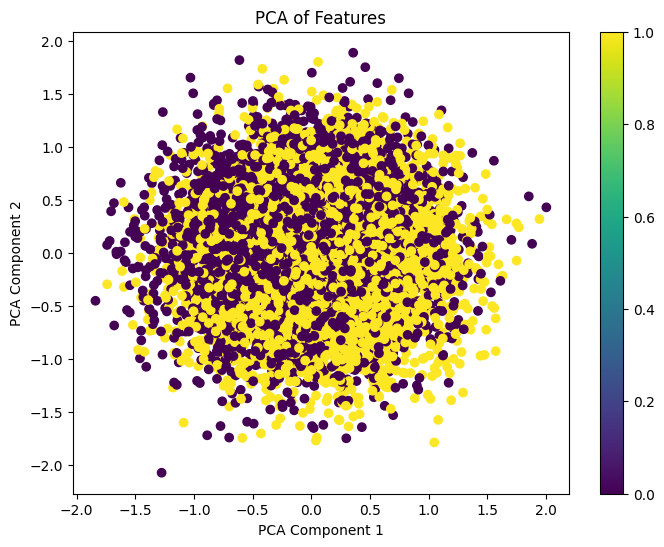

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(train_data.drop('output', axis=1))

# Scatter plot of PCA components
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=train_data['output'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Features')
plt.colorbar()
plt.show()

##### The PCA scatter plot you shared shows a dense clustering of points without much separation between the classes (indicated by color). This could imply that the features might not be linearly separable in the reduced 2D space, which is typical for high-dimensional data, especially when the original features are binary or not strongly correlated.

Binary values are already normalized between 0 and 1, so traditional scaling methods like Min-Max or Standard Scaler won't change them.

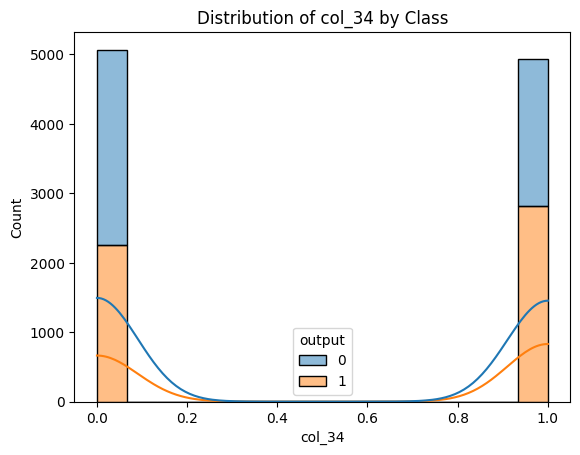

In [32]:
sns.histplot(data=train_data, x='col_34', hue='output', kde=True, multiple='stack')
plt.title('Distribution of col_34 by Class')
plt.show()


##### Model Building

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


# Split data into features and target
X = train_data.drop('output', axis=1)
y = train_data['output']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

y_val_pred_lr = lr_model.predict(X_val)
y_val_prob_lr = lr_model.predict_proba(X_val)[:, 1]

# Evaluation Metrics
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred_lr))
print("Validation ROC AUC Score:", roc_auc_score(y_val, y_val_prob_lr))
print("Validation F1 Score:", f1_score(y_val, y_val_pred_lr))

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       972
           1       0.99      0.99      0.99      1028

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

Validation ROC AUC Score: 0.9995186226001185
Validation F1 Score: 0.9898008742107819


##### The classification report includes several metrics:

Precision: This measures the proportion of true positive predictions among all positive predictions. For class 1, precision is 0.99, meaning that 99% of the time when the model predicts class 1, it is correct. Similarly, for class 0, precision is also 0.99.

Recall: This measures the proportion of true positives identified among all actual positives. A recall of 0.99 for class 1 indicates that the model correctly identifies 99% of all actual class 1 instances. Similarly, for class 0, the recall is also 0.99.

F1-Score: The F1-score is the harmonic mean of precision and recall. It balances the two metrics, especially useful when there is an uneven class distribution. Here, both classes have an F1-score of 0.99.

Support: The support is the number of occurrences of each class in the validation set. There are 972 samples of class 0 and 1028 samples of class 1.

Accuracy: The overall accuracy of the model is 0.99, which means that 99% of the predictions are correct.

##### ROC AUC Score (0.9995186226001185):

This score represents the Area Under the Receiver Operating Characteristic Curve.

It evaluates the model's ability to distinguish between the positive and negative classes across all thresholds.

A score of 0.9995 is very close to 1, indicating that the model almost perfectly distinguishes between the classes.

##### F1 Score (0.9898008742107819):

This score is a balance between precision and recall.

An F1 score close to 1 indicates that the model performs very well in terms of both precision and recall.

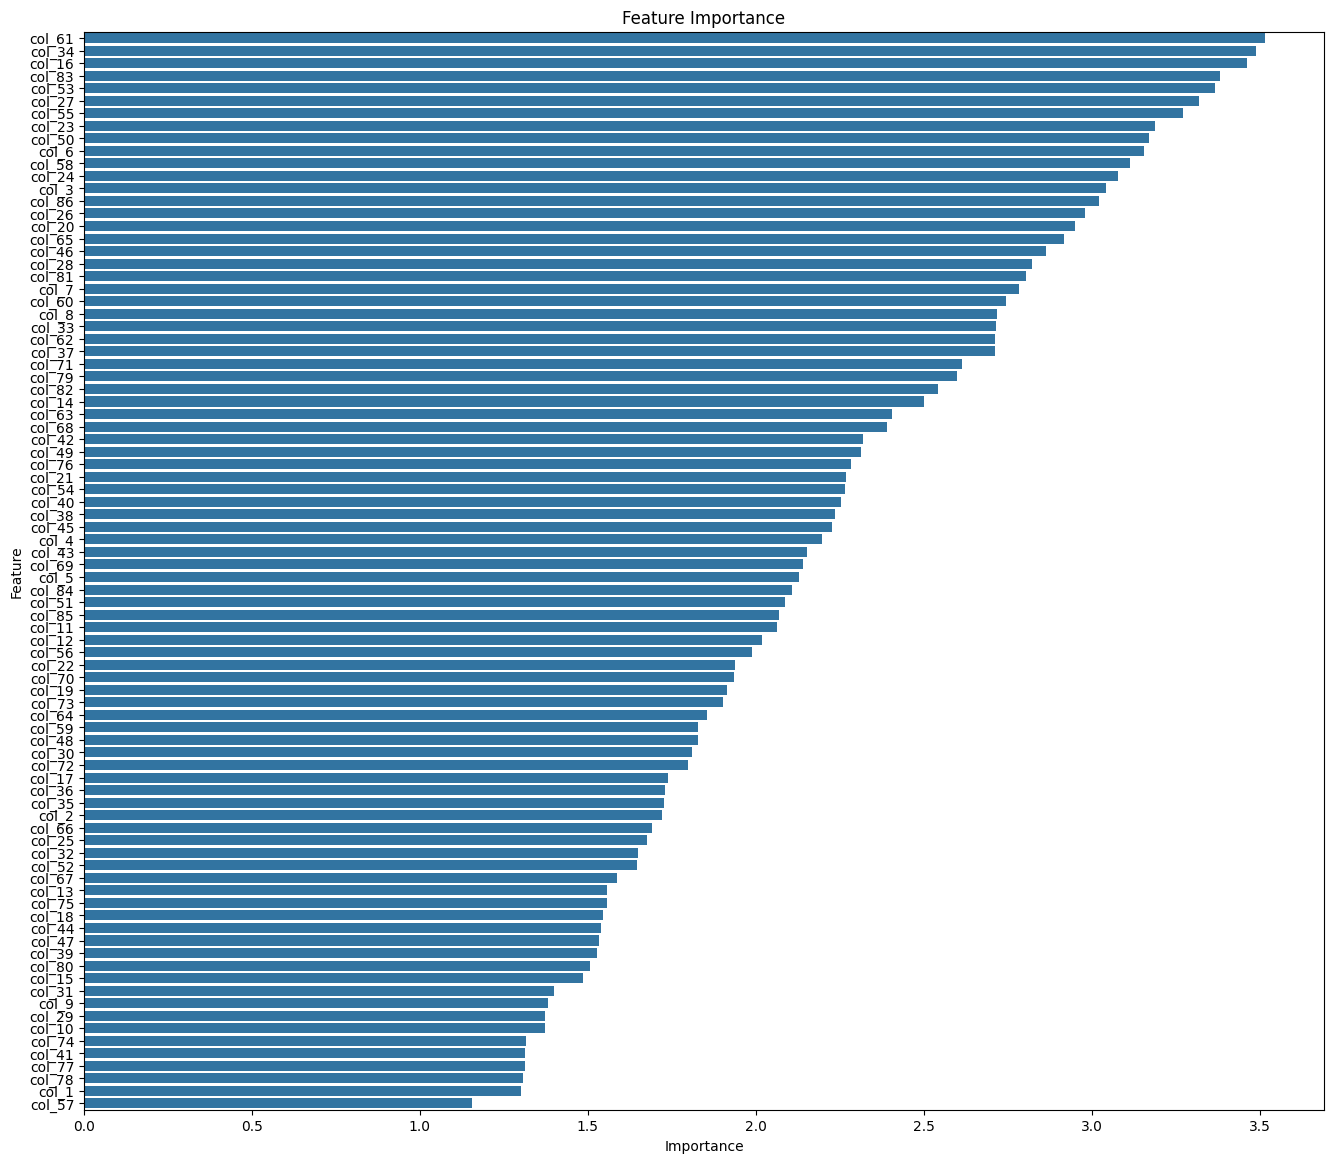

Feature Importance from Logistic Regression:
    Feature  Importance
60  col_61    3.515725
33  col_34    3.488097
15  col_16    3.461038
82  col_83    3.380702
52  col_53    3.368245
..     ...         ...
40  col_41    1.314044
76  col_77    1.313141
77  col_78    1.305664
0    col_1    1.301340
56  col_57    1.155860

[86 rows x 2 columns]


In [35]:
# Function to get and plot feature importance
def get_feature_importance(model, feature_names):
    importance = model.coef_[0]
    feature_importance = pd.DataFrame(list(zip(feature_names, importance)), columns=['Feature', 'Importance'])
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(16, 14))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.show()

    return feature_importance

feature_importance_lr = get_feature_importance(lr_model, X_train.columns)
print("Feature Importance from Logistic Regression:\n", feature_importance_lr)
    

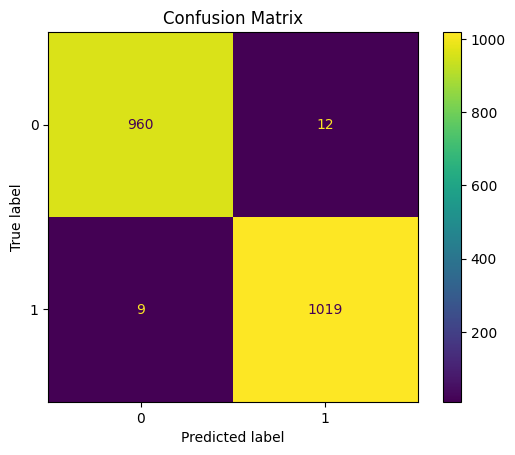

In [36]:
def plot_confusion_matrix(y_true, y_pred, model_classes):
    """
    Plots the confusion matrix for the given true and predicted labels.

    Parameters:
    y_true (array-like): True labels.
    y_pred (array-like): Predicted labels.
    model_classes (array-like): Class labels used in the model.
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_classes)
    disp.plot()
    plt.title('Confusion Matrix')
    plt.show()

# Call the function with appropriate arguments
plot_confusion_matrix(y_val, y_val_pred_lr, lr_model.classes_)

The confusion matrix indicates that the model correctly classified TP_value instances as true positives (1) and TN_value instances as true negatives (0). However, there were FP_value false positives, where the model incorrectly predicted the positive class, and FN_value false negatives, where the model missed the actual positives. This suggests that while the model has high precision, accurately identifying most of the positive cases it predicts, it might still miss some positive instances or misclassify some negatives. Evaluating the precision and recall metrics separately will provide a clearer understanding of the model's performance in balancing the trade-offs between false positives and false negatives.

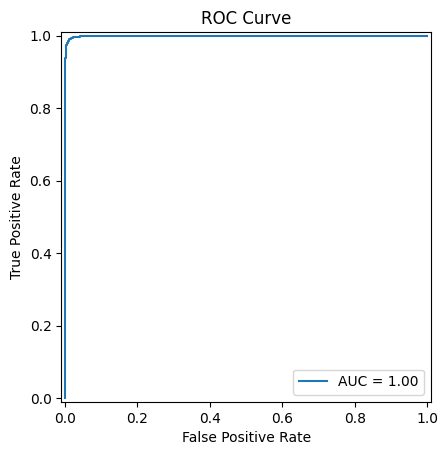

In [37]:
from sklearn.metrics import roc_curve, RocCurveDisplay

def plot_roc_curve(y_true, y_prob):
    """
    Plots the ROC curve for the given true labels and predicted probabilities.

    Parameters:
    y_true (array-like): True labels.
    y_prob (array-like): Predicted probabilities.
    """
    # Compute ROC curve and ROC area for the model
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score(y_true, y_prob))
    roc_display.plot()
    plt.title('ROC Curve')
    plt.show()

# Call the function with appropriate arguments
plot_roc_curve(y_val, y_val_prob_lr)


# The ROC curve illustrates the trade-off between true positive rate (TPR) and false positive rate (FPR).

In [38]:
# hybrid score - We calculate this as weighted sum of the individual metrics
# 1. Balanced Evaluation of Model Performance: Combining these metrics ensures that the model is not only good at distinguishing classes but also balanced in terms of its precision and recall.
# 2. Flexibility through Weighting: The weights w1 and w2 provide flexibility to adjust the relative importance of F1-Score and AUC-ROC.

def hybrid_score(y_true, y_pred, y_proba, f1_weight=0.5, auc_weight=0.5):
   

    f1 = f1_score(y_true, y_pred)
    print("F1 Score:", f1)
    auc = roc_auc_score(y_true, y_proba)
    print("ROC AUC Score:", auc)

    hybrid_score = f1_weight * f1 + auc_weight * auc

    return hybrid_score

# Call the function with appropriate arguments
print("Hybrid Score:", hybrid_score(y_val, y_val_pred_lr, y_val_prob_lr))


F1 Score: 0.9898008742107819
ROC AUC Score: 0.9995186226001185
Hybrid Score: 0.9946597484054502


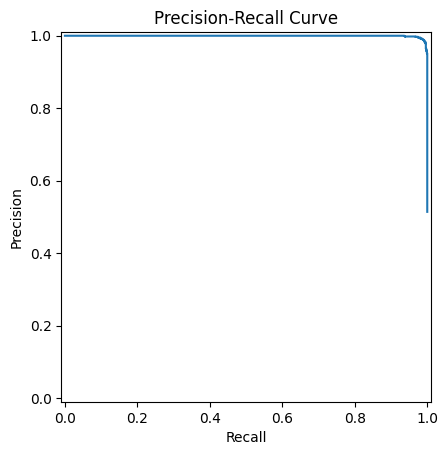

In [39]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

def plot_precision_recall_curve(y_true, y_prob):
    """
    Plots the Precision-Recall curve for the given true labels and predicted probabilities.

    Parameters:
    y_true (array-like): True labels.
    y_prob (array-like): Predicted probabilities.
    """
    # Compute Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)
    pr_display.plot()
    plt.title('Precision-Recall Curve')
    plt.show()

# Call the function with appropriate arguments
plot_precision_recall_curve(y_val, y_val_prob_lr)

# The Precision-Recall curve illustrates the trade-off between precision and recall for different thresholds.

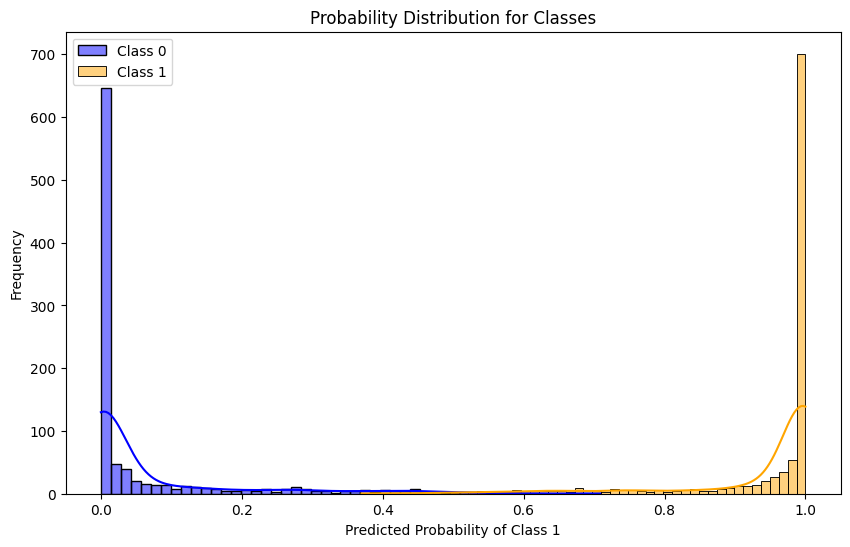

In [40]:
import seaborn as sns

def plot_probability_distribution(y_true, y_prob):
    """
    Plots the histogram of predicted probabilities for each class.

    Parameters:
    y_true (array-like): True labels.
    y_prob (array-like): Predicted probabilities.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(y_prob[y_true == 0], bins=50, color='blue', label='Class 0', kde=True)
    sns.histplot(y_prob[y_true == 1], bins=50, color='orange', label='Class 1', kde=True)
    plt.title('Probability Distribution for Classes')
    plt.xlabel('Predicted Probability of Class 1')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Call the function with appropriate arguments
plot_probability_distribution(y_val, y_val_prob_lr)


In [41]:
# Running the model on the test data
y_test_prob_lr = lr_model.predict_proba(test_data)[:, 1]
y_test_pred_lr = lr_model.predict(test_data)

# Save the predictions to a CSV file
output = pd.DataFrame({'output': y_test_pred_lr})
output.to_csv('submissions_lr.csv', index=False)





In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer

# Random Forest Classifier with Grid Search for Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}


custom_scorer = make_scorer(lambda y_true, y_pred, proba: hybrid_score(y_true, y_pred, proba[:, 1]),
                            needs_proba=True)

rf_model = RandomForestClassifier(random_state=42)
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


grid_search = GridSearchCV(estimator=rf_model, 
                           param_grid=param_grid, 
                           cv=stratified_kfold,
                           scoring=custom_scorer, 
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best model and evaluation
best_rf_model = grid_search.best_estimator_
y_val_rf_pred = best_rf_model.predict(X_val)
y_val_rf_prob = best_rf_model.predict_proba(X_val)[:, 1]

print("Best Parameters for Random Forest:", grid_search.best_params_)
print("Validation ROC AUC Score (RF):", roc_auc_score(y_val, y_val_rf_prob))
print("Validation F1 Score (RF):", f1_score(y_val, y_val_rf_pred))


c:\Users\hsingh\OneDrive - INVIDI Technologies Corp\Invidi_Project\impressions_forecasting_ratings\venv_ratings\Lib\site-packages\sklearn\metrics\_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
c:\Users\hsingh\OneDrive - INVIDI Technologies Corp\Invidi_Project\impressions_forecasting_ratings\venv_ratings\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan


Best Parameters for Random Forest: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Validation ROC AUC Score (RF): 0.8654785351715746
Validation F1 Score (RF): 0.7992477668077104


In [43]:
# Run the model on the test data
y_test_rf_pred = best_rf_model.predict(test_data)

# Save the predictions to a CSV file
output_rf = pd.DataFrame({'output': y_test_rf_pred})
output_rf.to_csv('submissions_rf.csv', index=False)

In [44]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [45]:
# Fully Connected Neural Network (FNN)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization, LeakyReLU



# Convert data to numpy arrays
X_train_np = np.array(X_train)
X_val_np = np.array(X_val)
y_train_np = np.array(y_train)
y_val_np = np.array(y_val)



def build_fnn_model(input_data):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.3))
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.3))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.3))
    
    model.add(Dense(16))
    model.add(LeakyReLU(alpha=0.1))
    
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    

    return model

input_dim = X_train_np.shape[1]
fnn_model = build_fnn_model(input_dim)
fnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])





c:\Users\hsingh\OneDrive - INVIDI Technologies Corp\Invidi_Project\impressions_forecasting_ratings\venv_ratings\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\hsingh\OneDrive - INVIDI Technologies Corp\Invidi_Project\impressions_forecasting_ratings\venv_ratings\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [46]:
fnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        11,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,913 (89.50 KB)

 Trainable params: 22,465 (87.75 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9524 - loss: 0.1164 - val_accuracy: 0.9575 - val_loss: 0.1036
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9584 - loss: 0.1111 - val_accuracy: 0.9575 - val_loss: 0.0986
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9552 - loss: 0.1127 - val_accuracy: 0.9610 - val_loss: 0.1033
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9517 - loss: 0.1145 - val_accuracy: 0.9620 - val_loss: 0.0976
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9553 - loss: 0.1154 - val_accuracy: 0.9585 - val_loss: 0.0998
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9547 - loss: 0.1135 - val_accuracy: 0.9595 - val_loss: 0.0942
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9549 - loss: 0.1110 - val_accuracy: 0.9585 - val_loss: 0.0994
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9610 - loss: 0.1026 - val_accu

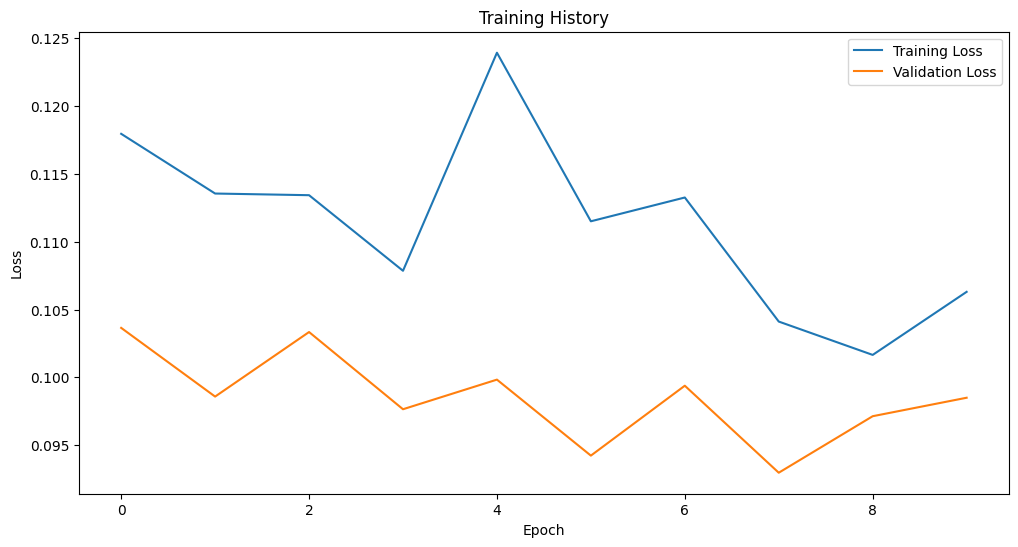

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step
Validation ROC AUC Score (FNN): 0.9957256489087445
Validation F1 Score (FNN): 0.9597728348319924
F1 Score: 0.9597728348319924
ROC AUC Score: 0.9957256489087445
Hybrid Score (FNN): 0.9777492418703684
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step


ValueError: Per-column arrays must each be 1-dimensional

In [48]:
history = fnn_model.fit(X_train_np, y_train_np, 
                        validation_data=(X_val_np, y_val_np), 
                        epochs=100,
                        batch_size=32,
                        callbacks=[early_stopping],)

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predictions on validation data
y_val_fnn_prob = fnn_model.predict(X_val_np)
y_val_fnn_pred = (y_val_fnn_prob > 0.5).astype(int)

print("Validation ROC AUC Score (FNN):", roc_auc_score(y_val_np, y_val_fnn_prob))
print("Validation F1 Score (FNN):", f1_score(y_val_np, y_val_fnn_pred))

# Hybrid Score for FNN
print("Hybrid Score (FNN):", hybrid_score(y_val_np, y_val_fnn_pred, y_val_fnn_prob))



#run on test data
test_data_np = np.array(test_data)
y_test_fnn_prob = fnn_model.predict(test_data_np)
y_test_fnn_pred = (y_test_fnn_prob > 0.5).astype(int)

# Save the predictions to a CSV file
output_fnn = pd.DataFrame({'output': y_test_fnn_pred})
output_fnn.to_csv('submissions_fnn.csv', index=False)

In [3]:
from collections import Counter

def findMaximumTasks(n, tasks, m):
    from collections import Counter

    cnt = Counter(tasks)
    total_min = sum(min(count, m) for count in cnt.values())
    k = min(n // m, total_min // m)
    total_tasks = m * k
    return total_tasks

# Example Test Case
n = 7
tasks = [1, 2, 2, 1, 3, 1, 3]
m = 2
print(findMaximumTasks(n, tasks, m))  # Expected Output: 6

# Additional Test Case
n = 4
tasks = [1, 2, 1, 1]
m = 2
print(findMaximumTasks(n, tasks, m))  # Expected Output: 2


n= 3
tasks =[1,3,2]
m = 3
print(findMaximumTasks(n, tasks, m))  # Expected Output: 3

6
2
3


In [4]:
def missingWords(s, t):
    s_words = s.split()
    t_words = t.split()
    missing = []
    i, j = 0, 0
    while i < len(s_words):
        if j < len(t_words) and s_words[i] == t_words[j]:
            j += 1
        else:
            missing.append(s_words[i])
        i += 1
    return missing

s = 'I like cheese'
t = 'like'
print(missingWords(s, t))  # Output: ['I', 'cheese']


['I', 'cheese']
